Скачайте данные классификации листьев растений по ссылке.
https://archive.ics.uci.edu/ml/machine-learning-databases/00241/

Загрузим файл `data_Mar_64.txt`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from google.colab import files
# uploder = files.upload()

In [2]:
data = pd.read_csv('data_Mar_64.txt', header=None)


Первый столбец — ответ, положим его в отдельную переменную.

In [3]:
X, y_name = np.array(data.iloc[:, 1:]), data.iloc[:, 0]

Целевая переменная принимает текстовое значение. С помощью `LabelEncoder` из `sklearn` закодируйте тектовую переменную `y_name` и сохраните полученные значения в переменную `y`.

In [4]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y_name)

array([ 0,  0,  0, ..., 99, 99, 99])

С помощью метода главных компонент снизьте размерность признакового пространства до двух. Зафиксируйте `random_state=0`

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=0)
X_2dim_pca = pca.fit_transform(X)

Выберите объекты, которые соответствуют значениям от 0 до 14 целевой переменной `y`. Изобразите выбранные объекты в двумерном пространстве признаков с помощью метода `scatter` из `matplotlib.pyplot`. Чтобы разным цветом отобразить объекты разных классов, в метод `scatter` передайте `c = y[y<15]`.

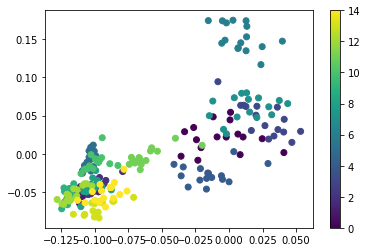

In [6]:
X_lt_15_pca = X_2dim_pca[np.argwhere(y < 15)]

plt.scatter(
    X_lt_15_pca[:, :, 0],
    X_lt_15_pca[:, :, 1],
    c = y[y < 15]
)
plt.colorbar()
plt.show()

Проделайте тоже самое для метода TSNE.

In [7]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
X_2dim_tsne = tsne.fit_transform(X)

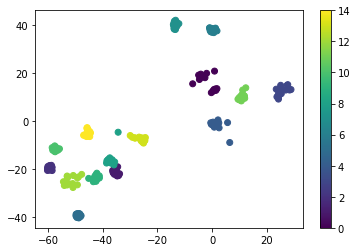

In [8]:
X_lt_15_tsne = X_2dim_tsne[np.argwhere(y < 15)]

plt.scatter(
    X_lt_15_tsne[:, :, 0],
    X_lt_15_tsne[:, :, 1],
    c = y[y < 15]
)
plt.colorbar()
plt.show()

1. Укажите координаты объекта с индексом 0 (`X[0]`) после применения метода TSNE.

In [9]:
X_2dim_tsne[0]

array([-7.1163464, 15.603844 ], dtype=float32)

2. Укажите координаты объекта с индексом 0 (X[0]) после применения метода PCA.

In [10]:
X_2dim_pca[0]

array([-0.03307489,  0.02892331])

3. Какие выводы можно сделать из полученных изображений? (выделите полужирным)
- С помощью метода главных компонет удалось визуализировать объекты на плоскости и объекты разных классов визуально разделимы 

- **С помощью метода TSNE удалось визуализировать объекты на плоскости и объекты разных классов визуально разделимы**

- С помощью методов TSNE и PCA удалось визуализировать объекты на плоскости и объекты разных классов визуально разделимы

- С помощью методов TSNE и PCA удалось визуализировать объекты на плоскости и объекты разных классов визуально не разделимы
